In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
import datetime as dt

rcParams = {'font.size': 20, 
            'font.weight': 'normal', 
            'font.family': 'sans-serif',
            'axes.unicode_minus':False, 
            'axes.labelweight':'normal', 
            'xtick.labelsize' : 16,
            'ytick.labelsize' : 16}

def Load_CSV(filepath):
    df = pd.DataFrame()
    iters = pd.read_csv(filepath,sep = "\t",chunksize=100000, engine='c')
    for i in iters:
        df = df.append(i, ignore_index = True)
    return df

In [2]:
data_dir = '/Users/harihara/Mount-2/hotspring_metagenome/Synechococcus_paper_analysis/Differential_Read_Counting/'

In [3]:
OSA_averages = pd.DataFrame()
OSB_averages = pd.DataFrame()
for f in listdir(data_dir):
    if f.startswith("Hot"):
        sample = f.replace("_Diff_Read_Count", "")
        df_OSA = Load_CSV(data_dir+f+'/Genome.OSA.Coverage.gz')
        df_OSB = Load_CSV(data_dir+f+'/Genome.OSB.Coverage.gz')
        
        OSA_averages[sample] = df_OSA['Fold_Cov'].tolist()
        OSB_averages[sample] = df_OSB['Fold_Cov'].tolist()
        
        del df_OSA, df_OSB
        print(dt.datetime.now(), sample)

2022-05-24 16:24:58.437827 Hotspr20Samplet1
2022-05-24 16:25:20.779958 Hotspr2Sample149
2022-05-24 16:25:50.547694 HotsprSampleR4cd
2022-05-24 16:26:17.026292 HotsprSampOS1260
2022-05-24 16:26:39.169768 HotsprSampleOS50
2022-05-24 16:27:03.190288 HotsprSampleMS50
2022-05-24 16:27:28.747207 HotsprSampleOS60
2022-05-24 16:27:55.961938 HotsprSampleMSe3
2022-05-24 16:28:24.375431 Hotspr20SampleT9
2022-05-24 16:28:51.119966 HotsprSampleOS55
2022-05-24 16:29:17.188279 HotsprSamplt10cd
2022-05-24 16:29:46.983692 HotsprSampleMSe4
2022-05-24 16:30:13.325498 HotsprSampleOSM1
2022-05-24 16:30:39.629312 HotsprSampleMS65
2022-05-24 16:31:04.147144 HotsprSampleOS65
2022-05-24 16:31:28.072043 HotsprSampOS1265
2022-05-24 16:31:57.064658 HotsprSampleOSM4
2022-05-24 16:32:21.429687 HotsprSampleMS55
2022-05-24 16:32:50.443004 HotsprSampleOSM3
2022-05-24 16:33:07.715318 HotsprottomLayer
2022-05-24 16:33:37.058468 Hotspr20SampleT8
2022-05-24 16:34:10.190582 Hotspr20SampleP4
2022-05-24 16:34:29.286679 Hotsp

In [4]:
w = 500
plt.rcParams.update(rcParams)

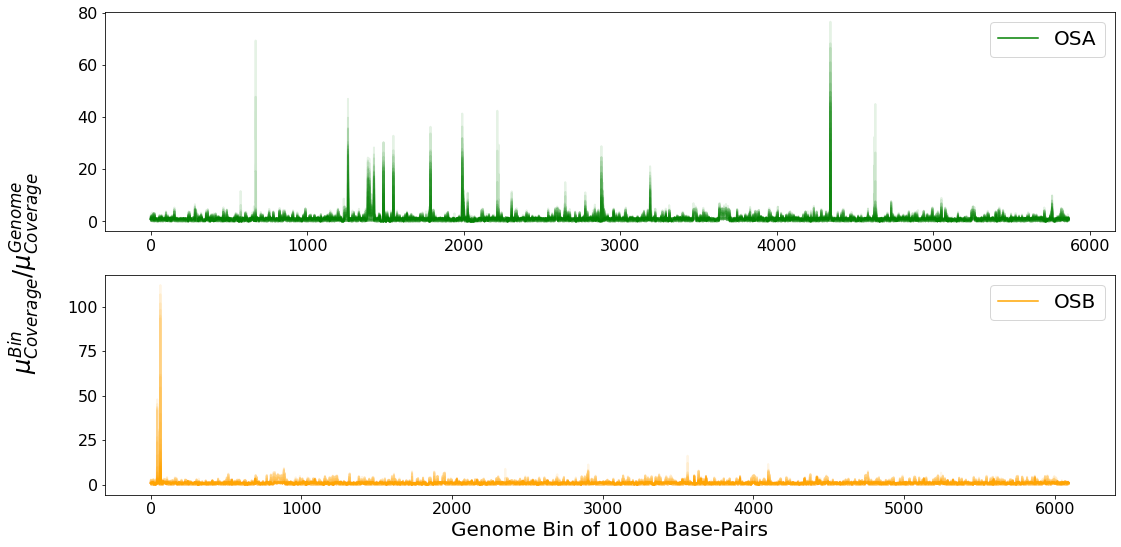

In [5]:
OSA_bin_avg_mat = (OSA_averages.rolling(w).mean()[w-1::w]/OSA_averages.mean()).values.T
OSB_bin_avg_mat = (OSB_averages.rolling(w).mean()[w-1::w]/OSB_averages.mean()).values.T

fig,ax = plt.subplots(2,1,figsize = (16,8))
ctr = 0
for i in range(0, len(OSA_bin_avg_mat)):
    ax[0].plot(OSA_bin_avg_mat[i], color = 'green', alpha = 0.1, linewidth = 2)
    ctr += 1
ax[0].plot(0,0, color = 'green', label = 'OSA')
ax[0].legend(loc=1)

ctr = 0
for i in range(0, len(OSB_bin_avg_mat)):
    ax[1].plot(OSB_bin_avg_mat[i], color = 'orange', alpha = 0.1, linewidth = 2)
    ctr += 1
ax[1].plot(0,0, color = 'orange', label = 'OSB')
ax[1].legend(loc=1)
fig.supylabel(r'$\mu_{Coverage}^{Bin}/\mu_{Coverage}^{Genome}$')
ax[1].set_xlabel('Genome Bin of 1000 Base-Pairs')
fig.tight_layout()
fig.savefig('/Users/harihara/Research-Activities/Plots/Hot_Spring_Plots/Synechococcus-Paper/Bin-Coverage-Mean.pdf')
del OSA_bin_avg_mat, OSB_bin_avg_mat

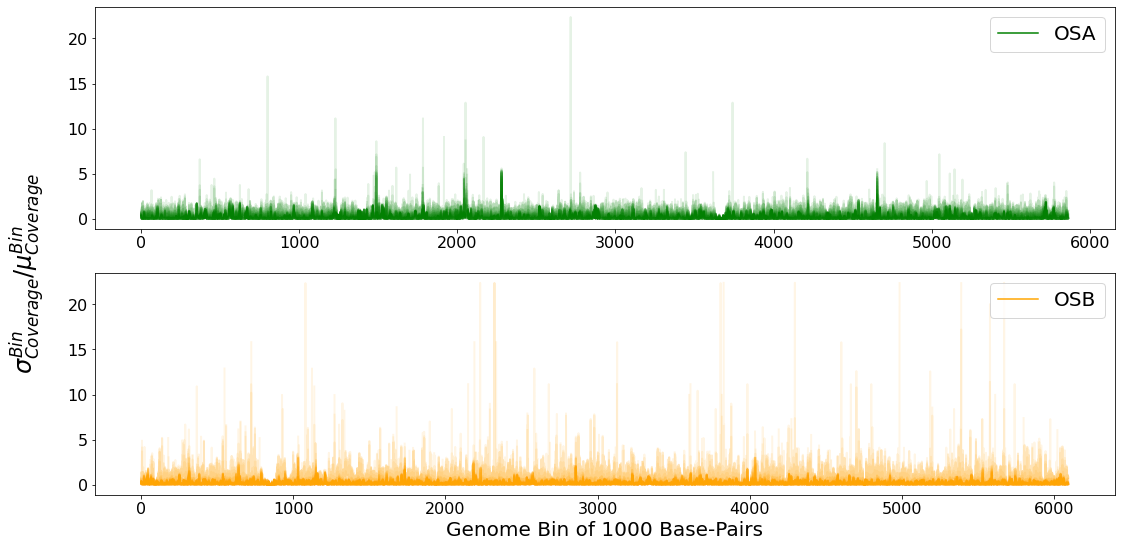

In [6]:
OSA_bin_avg_mat = (OSA_averages.rolling(w).std()[w-1::w]/OSA_averages.rolling(w).mean()[w-1::w]).values.T
OSB_bin_avg_mat = (OSB_averages.rolling(w).std()[w-1::w]/OSB_averages.rolling(w).mean()[w-1::w]).values.T

fig,ax = plt.subplots(2,1,figsize = (16,8))

ctr = 0
for i in range(0, len(OSA_bin_avg_mat)):
    ax[0].plot(OSA_bin_avg_mat[i], color = 'green', alpha = 0.1, linewidth = 2)
    ctr += 1
ax[0].plot(0,0, color = 'green', label = 'OSA')
ax[0].legend(loc = 1)

ctr = 0
for i in range(0, len(OSB_bin_avg_mat)):
    ax[1].plot(OSB_bin_avg_mat[i], color = 'orange', alpha = 0.1, linewidth = 2)
    ctr += 1
ax[1].plot(0,0, color = 'orange', label = 'OSB')
ax[1].legend(loc = 1)
   
fig.supylabel(r'$\sigma_{Coverage}^{Bin}/\mu_{Coverage}^{Bin}$')
ax[1].set_xlabel('Genome Bin of 1000 Base-Pairs')

fig.tight_layout()
fig.savefig('/Users/harihara/Research-Activities/Plots/Hot_Spring_Plots/Synechococcus-Paper/Bin-Coverage-CV.pdf')
del OSA_bin_avg_mat, OSB_bin_avg_mat


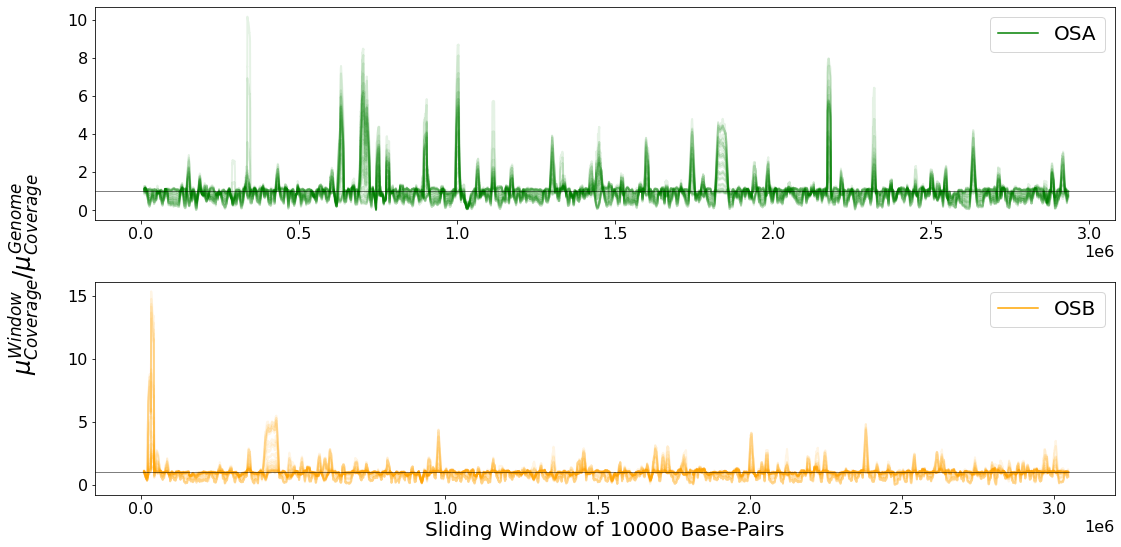

In [7]:
w = 10000

OSA_bin_avg_mat = (OSA_averages.rolling(w).mean()/OSA_averages.mean()).values.T
OSB_bin_avg_mat = (OSB_averages.rolling(w).mean()/OSB_averages.mean()).values.T

fig,ax = plt.subplots(2,1,figsize = (16,8))
ctr = 0
for i in range(0, len(OSA_bin_avg_mat)):
    ax[0].plot(OSA_bin_avg_mat[i], color = 'green', alpha = 0.1, linewidth = 2)
    ctr += 1    
ax[0].plot(0,0, color = 'green', label = 'OSA')
ax[0].legend()  
ax[0].axhline(1, color = 'black',linewidth=0.5)

ctr = 0

for i in range(0, len(OSB_bin_avg_mat)):
    ax[1].plot(OSB_bin_avg_mat[i], color = 'orange', alpha = 0.1, linewidth = 2)
    ctr += 1
ax[1].plot(0,0, color = 'orange', label = 'OSB')
ax[1].legend()
ax[1].axhline(1, color = 'black',linewidth=0.5)

fig.supylabel(r'$\mu_{Coverage}^{Window}/\mu_{Coverage}^{Genome}$')
ax[1].set_xlabel('Sliding Window of 10000 Base-Pairs')

fig.tight_layout()
fig.savefig('/Users/harihara/Research-Activities/Plots/Hot_Spring_Plots/Synechococcus-Paper/Rolling-Coverage-Mean.pdf')

del OSA_bin_avg_mat, OSB_bin_avg_mat


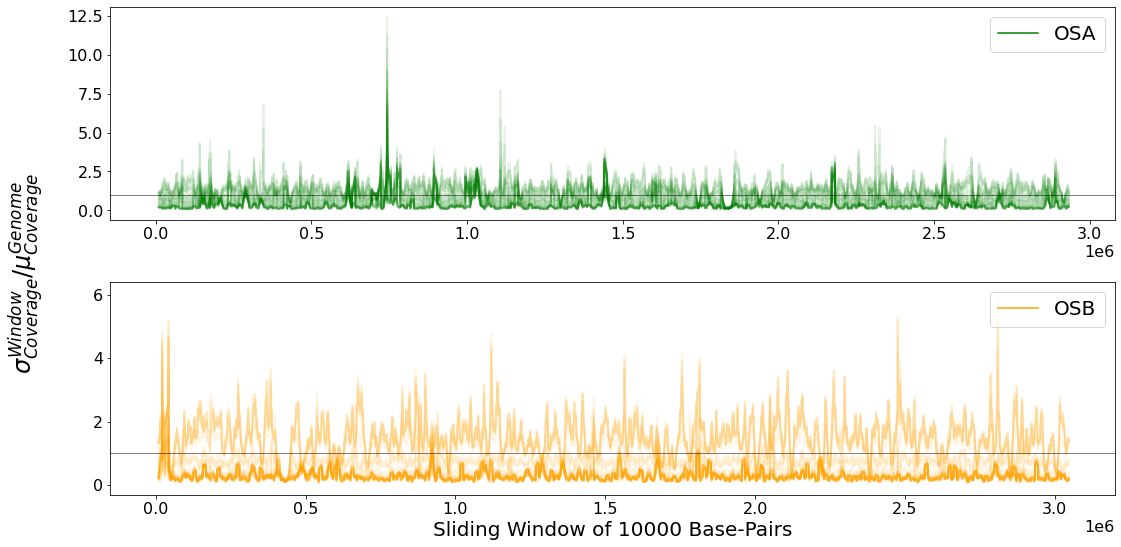

In [8]:
OSA_bin_avg_mat = (OSA_averages.rolling(w).std()/OSA_averages.rolling(w).mean()).values.T
OSB_bin_avg_mat = (OSB_averages.rolling(w).std()/OSB_averages.rolling(w).mean()).values.T

fig,ax = plt.subplots(2,1,figsize = (16,8))
ctr = 0
for i in range(0, len(OSA_bin_avg_mat)):
    ax[0].plot(OSA_bin_avg_mat[i], color = 'green', alpha = 0.1, linewidth = 2)
    ctr += 1
ax[0].plot(0,0, color = 'green', label = 'OSA')
ax[0].legend(loc = 1) 
ax[0].axhline(1, color = 'black',linewidth=0.5)

ctr = 0
for i in range(0, len(OSB_bin_avg_mat)):
    ax[1].plot(OSB_bin_avg_mat[i], color = 'orange', alpha = 0.1, linewidth = 2)
    ctr += 1
ax[1].plot(0,0, color = 'orange', label = 'OSB')
ax[1].legend(loc = 1)
ax[1].axhline(1, color = 'black',linewidth=0.5)

fig.supylabel(r'$\sigma_{Coverage}^{Window}/\mu_{Coverage}^{Genome}$')
ax[1].set_xlabel('Sliding Window of 10000 Base-Pairs')

fig.tight_layout()
fig.savefig('/Users/harihara/Research-Activities/Plots/Hot_Spring_Plots/Synechococcus-Paper/Rolling-Coverage-CV.pdf')

del OSA_bin_avg_mat, OSB_bin_avg_mat


In [11]:
df_MS60_OSA = pd.read_csv(data_dir+'HotsprSampleMS50_Diff_Read_Count/Genome.OSA.Coverage.gz', sep = "\t")
df_MS60_OSB = pd.read_csv(data_dir+'HotsprSampleMS50_Diff_Read_Count/Genome.OSB.Coverage.gz', sep = "\t")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


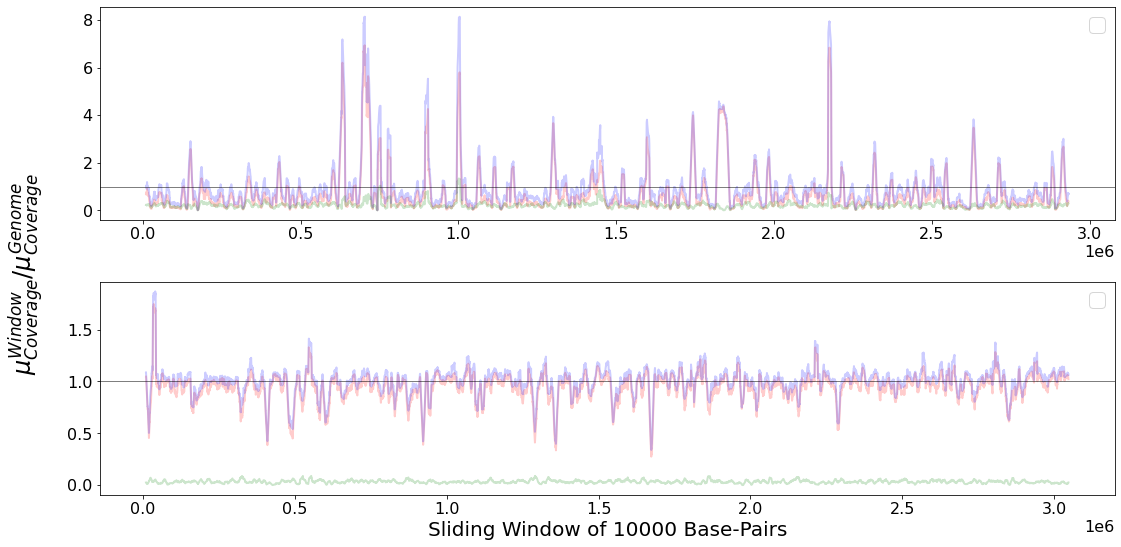

In [18]:
w = 10000
OSA_averages = df_MS60_OSA[['Good_Cov', 'Fold_Cov', 'Orphaned_Only', 'Mispaired_Both']]
OSB_averages = df_MS60_OSB[['Good_Cov', 'Fold_Cov', 'Orphaned_Only']]
colors = ['Red','Blue','Green']
OSA_bin_avg_mat = (OSA_averages.rolling(w).mean()/OSA_averages['Fold_Cov'].mean()).values.T
OSB_bin_avg_mat = (OSB_averages.rolling(w).mean()/OSB_averages['Fold_Cov'].mean()).values.T

fig,ax = plt.subplots(2,1,figsize = (16,8))
ctr = 0
for i in range(0, len(OSA_bin_avg_mat)):
    ax[0].plot(OSA_bin_avg_mat[i], color = colors[i], alpha = 0.2, linewidth = 2)
    ctr += 1    
#ax[0].plot(0,0, color = 'green', label = 'OSA')
ax[0].legend()  
ax[0].axhline(1, color = 'black',linewidth=0.5)

ctr = 0

for i in range(0, len(OSB_bin_avg_mat)):
    ax[1].plot(OSB_bin_avg_mat[i], color = colors[i], alpha = 0.2, linewidth = 2)
    ctr += 1
#ax[1].plot(0,0, color = , label = 'OSB')
ax[1].legend()
ax[1].axhline(1, color = 'black',linewidth=0.5)

fig.supylabel(r'$\mu_{Coverage}^{Window}/\mu_{Coverage}^{Genome}$')
ax[1].set_xlabel('Sliding Window of 10000 Base-Pairs')

fig.tight_layout()


In [23]:
df_MS60_OSA['Orphaned_Cov'] = (df_MS60_OSA['Orphaned_Only']+df_MS60_OSA['Orphaned_Both'])/df_MS60_OSA['Fold_Cov']
df_MS60_OSA['Mispaired_Cov'] = (df_MS60_OSA['Mispaired_Only']+df_MS60_OSA['Mispaired_Both'])/df_MS60_OSA['Fold_Cov']
df_MS60_OSB['Orphaned_Cov'] = (df_MS60_OSB['Orphaned_Only']+df_MS60_OSB['Orphaned_Both'])/df_MS60_OSB['Fold_Cov']
df_MS60_OSB['Mispaired_Cov'] = (df_MS60_OSB['Mispaired_Only']+df_MS60_OSB['Mispaired_Both'])//df_MS60_OSB['Fold_Cov']
df_MS60_OSA['Good_Cov'] = df_MS60_OSA['Good_Cov']/df_MS60_OSA['Fold_Cov']
df_MS60_OSB['Good_Cov'] = df_MS60_OSB['Good_Cov']/df_MS60_OSB['Fold_Cov']


<AxesSubplot:>

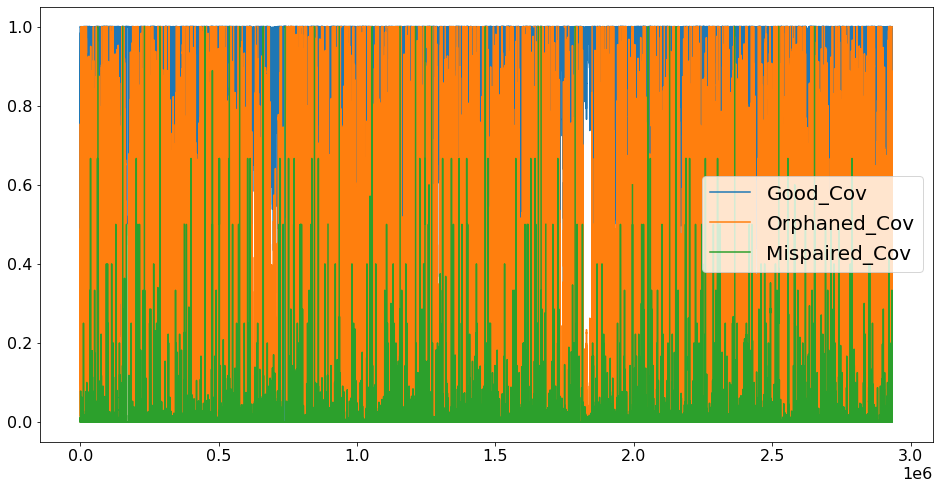

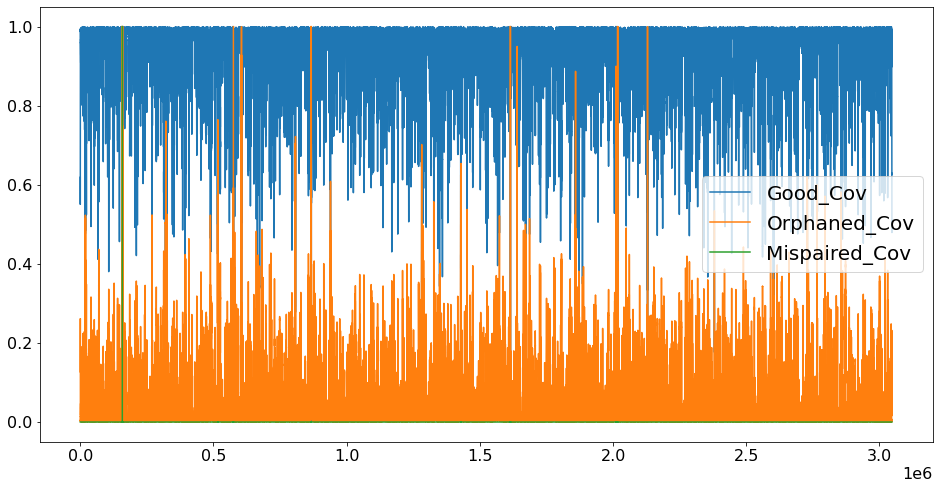

In [28]:
df_MS60_OSA[['Good_Cov','Orphaned_Cov','Mispaired_Cov']].rolling(1).mean().plot(figsize = (16,8))
df_MS60_OSB[['Good_Cov','Orphaned_Cov','Mispaired_Cov']].rolling(1).mean().plot(figsize = (16,8))
